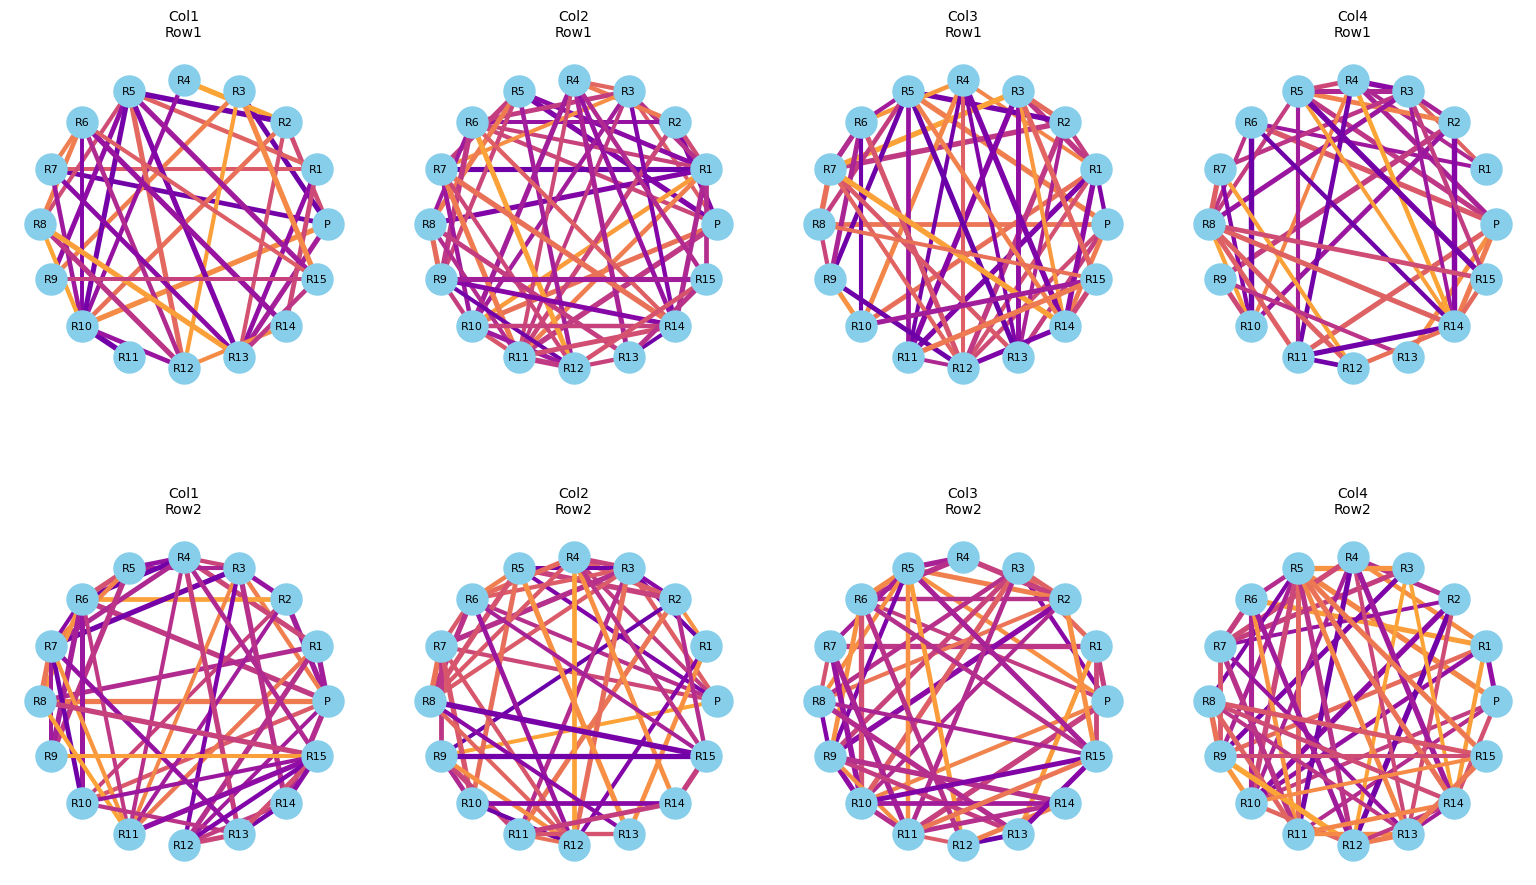

In [46]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import numpy as np
from typing import Dict, List, Optional
from matplotlib import cm
import warnings

warnings.filterwarnings("ignore")

def plot_dynamic_network(
    row_labels: List[str],
    col_labels: List[str],
    node_labels: List[str],
    edge_weights: Dict[tuple, List[float]],
    edge_colors: Dict[tuple, List[str]],
    nrows: Optional[int] = None,
    ncols: Optional[int] = None,
    weight_threshold: float = 0.5
) -> None:
    nrows = nrows or len(row_labels)
    ncols = ncols or len(col_labels)
    num_nodes = len(node_labels)
    expected_edges = num_nodes * (num_nodes - 1) // 2

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 4 + 3),
                             subplot_kw={'aspect': 'equal'})
    axes = np.array(axes).reshape(nrows, ncols)

    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i, j]
            row_lbl = row_labels[i % len(row_labels)]
            col_lbl = col_labels[j % len(col_labels)]
            ax.set_title(f"{col_lbl}\n{row_lbl}", fontsize=10, pad=10)

            G = nx.Graph()
            G.add_nodes_from(range(num_nodes))
            
            weights = edge_weights.get((row_lbl, col_lbl), [1] * expected_edges)
            colors = edge_colors.get((row_lbl, col_lbl), ['black'] * expected_edges)
            
            if len(weights) != expected_edges or len(colors) != expected_edges:
                raise ValueError(f"Edge data for ({row_lbl}, {col_lbl}) must have length {expected_edges}")

            edge_idx = 0
            for u in range(num_nodes):
                for v in range(u + 1, num_nodes):
                    if weights[edge_idx] >= weight_threshold:
                        G.add_edge(u, v, weight=weights[edge_idx], color=colors[edge_idx])
                    edge_idx += 1

            pos = nx.circular_layout(G)
            nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue', ax=ax)

            node_label_mapping = {i: f"R{i}" for i in range(num_nodes)}
            node_label_mapping[0] = "P"
            nx.draw_networkx_labels(
                G, pos,
                labels=node_label_mapping,
                font_size=8, ax=ax
            )

            edges = G.edges(data=True)
            edge_color_list = [e[2]['color'] for e in edges]
            edge_widths = [e[2]['weight'] * 2 for e in edges]

            nx.draw_networkx_edges(
                G, pos, ax=ax, 
                edge_color=edge_color_list, 
                width=edge_widths,
                connectionstyle="arc3,rad=0.2"
            )

            ax.axis('off')

    plt.subplots_adjust(bottom=0.05)
    plt.tight_layout(pad=3.0)
    plt.show()

row_labels = ["Row1", "Row2"]
col_labels = ["Col1", "Col2", "Col3", "Col4"]
node_labels = [f"R{i}" for i in range(16)]

edge_weights = {
    (row, col): np.random.uniform(0.5, 2.0, size=(len(node_labels)*(len(node_labels)-1))//2)
    for row in row_labels for col in col_labels
}

edge_colors = {
    (row, col): [matplotlib.colors.to_hex(plt.cm.plasma(v)) for v in np.random.uniform(0.2, 0.8, size=(len(node_labels)*(len(node_labels)-1))//2)]
    for row in row_labels for col in col_labels
}

plot_dynamic_network(row_labels, col_labels, node_labels, edge_weights, edge_colors, weight_threshold=1.4)
